# Task 2: Rescue Across The Rift

Our task is to first perform data cleaning on our given dataset that was partially corrupted due to a space anomaly that transported passengers from the legendary Star Trek passenger liner into unknown regions of space. We need to clean the dataset and provide a clean dataset as output.

For the second part of the task, we need to perform exploratory data analysis on our cleaned dataset to try to find correlations about why these passengers might have been transported by the anomaly and learn more about the incident and possible status of passengers.

In [1]:
#import necessary libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Get and check data
data = pd.read_csv('../Data/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
#Try to get an idea about the data
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


## Step 1: Data Cleaning

We will take a columnwise approach to data cleaning, and slowly cover all columns and try to clean the whole dataset that way in this case

### 1) Cleaning Passenger_Id and Name

We can clearly see some correlation between passenger Id and 'family' since 0003_01 and _02 correlate to people with same last name (and there is another example of the same in the 10 above as well)

This implies that passenger Id is divided into 2 parts:
- First part signifies family number in the ship (same last name)
- Second part signifies the name of the people in the family (possibly in alphabetical order)

In [4]:
#Let's first check for NaN values in passener Id and Name columns

print(f"Number of NaN values in passengerId is {data['PassengerId'].isna().sum()}")
print(f"Number of NaN values in Name is {data['Name'].isna().sum()}")


Number of NaN values in passengerId is 0
Number of NaN values in Name is 200


In [5]:
#Check if more likely to have NaN name if transported?

(data[data['Name'].isna()].loc[:, ['Transported']] == True).sum()
#Not more likely by the results

Transported    101
dtype: int64

In [6]:
#Just because passengerId doesn't have NaN values doesn't mean its clear
# let's check for duplicate values next, as that should not be allowed

data[data['PassengerId'].duplicated() == True]

#Ok good no duplicate values here
#I think this means that the whole PassengerId column should be clean already

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [7]:
#Now let's see what's up with the NaN values of names

data[data['Name'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8631,9208_01,Earth,True,G/1485/S,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8636,9218_01,Europa,True,B/353/S,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True


Hmm no explicit pattern seen here, maybe they are just completely random NaN values (which we cant fill in any way). Anyways, the name column in itself might be useless as the name itself doesnt matter

The passengerId has the 'family' and 'name' info in itself and the actual name doesn't matter.
We will probably end up dropping the name column entirely at the end of cleaning since it seems to be irrelevant in every way

What is interesting lies in our splitting passengerId into familyNo and nameNo idea.

First let's check whether our theory that people with same 'familyId' will have same 'last name', since that would confirm that that is how the Id works.


In [8]:
#First let's check how many such values there are (how many people part of 'families)

data['PassengerId'].str[:4].duplicated(keep = False).sum()
#Damn quite a lot

np.int64(3888)

In [9]:
#What we want to check:
#For every value of PassengerId with same first 4 starting letters, the corresponding Name's 2nd part (last name) is same

#We first create a dataset with boolean masking that returns all rows part of a 'family'
#Then we group by the first 4 letters (familyCode) 
#We apply a filter that checks if all people in a family have same last name
#We do this by splitting Name string into 2 and taking the last name
#And then we check for number of 'unique' last names, which should just be 1, if they all have the same last name
#So we filter to check for cases where the number of unique last names of all members in a group is NOT 1

data.groupby(data[data['PassengerId'].str[:4].duplicated(keep = False)]['PassengerId'].str[:4]).filter(lambda x: x['Name'].str.split().str[1].nunique() != 1)

#Welp there goes our theory (966 values that dont follow our theory spotted)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False
22,0020_02,Earth,True,E/0/S,55 Cancri e,49.0,False,0.0,0.0,0.0,0.0,0.0,Glendy Brantuarez,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
24,0020_04,Earth,False,E/0/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,True
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,9157_06,Earth,False,G/1476/S,TRAPPIST-1e,12.0,False,0.0,0.0,0.0,0.0,0.0,Pamont Navages,False
8578,9157_07,Earth,True,G/1476/S,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,Racey Navages,True
8639,9220_01,Earth,False,G/1496/P,TRAPPIST-1e,25.0,False,2.0,45.0,45.0,0.0,815.0,Branca Meyerthy,False
8640,9220_02,Earth,True,G/1496/P,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Frey Meyerthy,True


So this proves that groups are not based on direct family, so names and passengerId have no concrete connection as same group number will not imply same last name. Maybe these groups are family + friends/family + distant relatives, whatever the case may be, this observation makes our 'name' column completely useless at it is not connected to passengerId and has so many NaN values.

Thus we will drop the 'Name' column completely near the end of cleaning

In [10]:
# PassengerId contains GroupId which is important information to try to explore if people in same group were more likely to be transported or something
# PersonId (for the people in a group) might not be important
# But groupSize (number of people in group) could be an influential factor to explore

#We aim to add 2 new columns to a new df (final cleaned version), one is groupId and other is groupSize

cleanData = data.copy()

#Creating groupId column
cleanData['GroupId'] = data['PassengerId'].str[:4]
cleanData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


In [11]:
# Creating groupSize column

cleanData['GroupSize'] = data.groupby(data['PassengerId'].str[:4]).transform('size')
cleanData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1


In [12]:
#Finding the largest group size in dataset (simply)

cleanData['GroupSize'].max()

8

Okay, we are done with the first part where we explored passengerId (clean from the start), and Name (useless, so we delete column at the end)

We also added groupId and groupSize columns since that gives us important data

### 2) Homeplanet and Destination

These are very important and interesting datapoints to explore (passengers from Europa is crazy, Europa is a moon of Jupiter theorized to have water under its icy surface and is a potential place where life could exist)

In [13]:
#Let's know the possible planets and destinations

print(f"Possible HomePlanets are {data['HomePlanet'].unique()}")
print(f"Possible destinations are {data['Destination'].unique()}")

Possible HomePlanets are ['Europa' 'Earth' 'Mars' nan]
Possible destinations are ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [14]:
#Number of Nan values

print(f"Number of NaN values in HomePlanet is {data['HomePlanet'].isna().sum()}")
print(f"Number of NaN values in Destination is {data['Destination'].isna().sum()}")

Number of NaN values in HomePlanet is 201
Number of NaN values in Destination is 182


We can already see from above data viewing that people from same group need not necessarily have the same destination, but they might be from the same home planet, let's test that hypothesis:

In [15]:
# Are people in same group from the same home planet?

cleanData.groupby(cleanData['GroupId']).filter(lambda x: (x['HomePlanet'].nunique(dropna = True) != 1) & (x['HomePlanet'].nunique(dropna = True) != 0))

#Yes, people from the same group are from the same home planet, we can use this to fill in some NaN values.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize


In [16]:
#Let's check if there's any case where everyone in group has NaN HomePlanet value

cleanData.groupby(cleanData['GroupId']).filter(lambda x: ((x['HomePlanet'].isna() == True).all()) & ((x['GroupSize'] > 1).all()))

#Only these 2 bozos, let's deal with them separately later

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize
6917,7336_01,NaN,False,F/1411/S,TRAPPIST-1e,30.0,False,2.0,0.0,5.0,1.0,962.0,Dianie Lambles,False,7336,2
6918,7336_02,NaN,False,F/1411/S,TRAPPIST-1e,26.0,False,0.0,0.0,902.0,0.0,0.0,Tanley Leodger,False,7336,2


In [17]:
#Let's find all NaN values of people in group, to fill them in with the same HomePlanet as the rest of the group

cleanData[((cleanData['GroupSize'] > 1) & (cleanData['HomePlanet'].isna())) & (cleanData['GroupId'] != '7336')]
#We can deal with 90 such values

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,0064,2
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False,0119,2
405,0444_02,NaN,False,F/99/P,TRAPPIST-1e,26.0,True,1869.0,0.0,136.0,0.0,0.0,Colal Curte,False,0444,2
407,0445_02,NaN,False,E/25/S,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,77.0,715.0,Rice Marshopper,False,0445,2
438,0470_02,NaN,True,F/86/S,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,0.0,0.0,Jurs Binie,True,0470,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,8938_01,NaN,True,F/1729/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Quites Must,True,8938,2
8383,8961_04,NaN,False,F/1839/P,TRAPPIST-1e,21.0,False,0.0,6.0,0.0,593.0,0.0,Dandy Blancoy,False,8961,5
8454,9030_02,NaN,False,G/1465/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,298.0,511.0,Stace Ericksonga,False,9030,2
8489,9072_01,NaN,True,F/1758/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Gork Creke,True,9072,3


In [18]:
#Dealing with NaN HomePlanet values of group members

#To replace HomePlanet with first non-NaN value for all elements in same group
cleanData['HomePlanet'] = cleanData.groupby(cleanData['GroupId'])['HomePlanet'].transform('first')

#Check again
cleanData[((cleanData['GroupSize'] > 1) & (cleanData['HomePlanet'].isna())) & (cleanData['GroupId'] != '7336')]
#Successfully cleaned Yayyyy

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize


In [19]:
#Check how many NaN values left
print(f"Number of NaN values in HomePlanet is {cleanData['HomePlanet'].isna().sum()}")

Number of NaN values in HomePlanet is 111


In [20]:
#Ok to deal with those bozos, let's first see distribution of homeplanets

cleanData['HomePlanet'].value_counts(normalize = True)

#It is 50% likely they are from Earth

HomePlanet
Earth     0.539967
Europa    0.251806
Mars      0.208227
Name: proportion, dtype: float64

In [21]:
#I think it is justifiable to fill all the na values in HomePlanet with 'Earth' (including our bozos)
#We have already done the smart filling that we could from our observed pattern

#Filling Na values with mode (Earth)
cleanData['HomePlanet'] = cleanData['HomePlanet'].fillna('Earth')

#Verify
print(f"Number of NaN values in HomePlanet is {cleanData['HomePlanet'].isna().sum()}")

Number of NaN values in HomePlanet is 0


In [22]:
#Now let's deal with NaN values in Destination

cleanData['Destination'].value_counts(normalize = True)

#Over 69% of people headed to TRAPPIST-1e

Destination
TRAPPIST-1e      0.694983
55 Cancri e      0.211491
PSO J318.5-22    0.093526
Name: proportion, dtype: float64

In [23]:
#Think its very fair to fill Destination NaN values with TRAPPIST-1e

#Filling values
cleanData['Destination'] = cleanData['Destination'].fillna('TRAPPIST-1e')

#Verification
print(f"Number of NaN values in Destination is {cleanData['Destination'].isna().sum()}")

Number of NaN values in Destination is 0


In [24]:
#Final Verification that we didnt mess smtg up

print(f"Possible HomePlanets are {cleanData['HomePlanet'].unique()}")
print(f"Possible destinations are {cleanData['Destination'].unique()}")

Possible HomePlanets are ['Europa' 'Earth' 'Mars']
Possible destinations are ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


Okay, now we are done with the 2nd part where we finished cleaning up the HomePlanet and Destination columns.

First we smartly filled in some of the HomePlanet NaN values after noticing that people in same group always came from same HomePlanet (and noticed that same logic doesnt apply for Destination), then we filled the rest of the NaN values with the mode of HomePlanet and Destination values.

### 3) Cabin

Cabin values have some cryptic pattern that we will try to understand, which might help us further understand the situation on the passenger ship

In [25]:
#Let's try to figure out the pattern behind the cabin values

#There are clearly 3 different parts to it, and it seems like the last part can take values from {P, S}, and first part can take values from A to G (maybe)
#To test this let's split the string into 3 parts in the clean df and test our hypothesis

#Temp df
#tempData = cleanData.copy()
#Was originally done in temporary df but it's important so just added these new columns in our cleanData set

#Splitting string into 3 columns based on / 

cleanData[['Cabin P1', 'Cabin P2', 'Cabin P3']] = cleanData['Cabin'].str.split("/", expand = True)

cleanData.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,1,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,2,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006,2,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0007,1,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,3,B,1,P


In [26]:
#Let's analyze these 3 parts, starting from the first

cleanData['Cabin P1'].unique()
#Okay we were sorta wrong, part 1 takes values from {A, B, C, D, E, F, G, T} (what we hypothesized + T (interesting))

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [27]:
#Let's see how often this T comes up (maybe its an error?)

cleanData['Cabin P1'].value_counts()

#Truly could be an error, we will keep that into account for later

Cabin P1
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [28]:
#Let's see part 3 next, as that's interesting

cleanData['Cabin P3'].unique()

#Just like we predicted, what could P and S mean? hmm

array(['P', 'S', nan], dtype=object)

In [29]:
#Now let's see part 2

#Let's first convert Cabin P2 into integers

cleanData['Cabin P2'] = cleanData['Cabin P2'].astype('Int64')

cleanData['Cabin P2'].unique()
#Perhaps some sort of cabin number?

<IntegerArray>
[   0,    1,    2,    3, <NA>,    4,    5,    6,    8,    9,
 ...
 1782, 1884,  353, 1886, 1498, 1888, 1891, 1892, 1893, 1894]
Length: 1818, dtype: Int64

In [30]:
#Let's see if it is continous (all values betweeen 0 and 1894 are present?)

#initial = 0
#for i in range(1895):
#    if i not in cleanData['Cabin P2'].unique():
#        if initial == 0:
#         print(f"The first value missing between 0 and 1894 is {i}")
#         initial += 1
#        else:
#         initial += 1
#print(f"The number of values missing between 0 and 1894 is {initial}")

#I actually have no idea why i did this 
#i dont think it matters anyways since we know that some of the data is split into train and test (some passengerId are missing)
        

In [31]:
#Assuming Cabin P2 is some sort of cabin number, maybe ppl in each cabin shud have similar number of people?
# (or maybe A-G denotes size of cabin)

cleanData['Cabin P2'].value_counts()

#Each cabin no doesnt have similar no of ppl, but the range of number of people in a cabin ranges from 1 to 28

Cabin P2
82      28
86      22
19      22
176     21
56      21
        ..
1839     1
1848     1
1847     1
1749     1
1782     1
Name: count, Length: 1817, dtype: Int64

In [32]:
#Hypothesis: One room number cannot have 2 different Cabin P1 values (A-G) (since we think A-G symbolizes size of cabin)

cleanData.groupby(cleanData['Cabin P2']).filter(lambda x: x['Cabin P1'].nunique() != 1)

#Ok i was very much wrong :( (n thats ok :'))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,2,E,608,S


In [33]:
#Since A-G comes before cabin number, maybe its like 'block name' 
# and each block have their own set of numbers from 0 like that or smtg 
#Also each block gets progressively bigger (interestingly) (I WAS WRONG, F is bigger than G welp im blind)

#To test this: There should be all values from A-G (maybe even T if it actually means something) with cabin P2 = 0 (unless missing)

cleanData[cleanData['Cabin P2'] == 0]

#Yes, cabin no = 0 exists for all cabin block numbers from A-G AND even T

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,0,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,1,F,0,P
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006,2,G,0,S
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,0017,2,G,0,P
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,0020,6,E,0,S
22,0020_02,Earth,True,E/0/S,55 Cancri e,49.0,False,0.0,0.0,0.0,0.0,0.0,Glendy Brantuarez,False,0020,6,E,0,S
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False,0020,6,E,0,S


In [34]:
#Let's now investigate the mystery of the T cabin block (maybe they are VIP, maybe they are like special engineers or the pilots?)

cleanData[cleanData['Cabin P1'] == 'T']

#Absolutely nothing about them seems unique

#It is most likely/most natural to think that the T group is a mistake
# Firstly, it is out of order A-G and then skipping to T? 
# And if they were some 5 special people, I would've liked to seen evidence of that in their data, which is not present

#Imo it is most likely that these 5 people just have a wrong value of cabin block name

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
1004,1071_01,Earth,False,T/0/P,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,14.0,60.0,Alraida Dingauge,False,1071,1,T,0,P
2254,2414_01,Europa,False,T/1/P,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,3133.0,2447.0,Mergak Headfair,False,2414,1,T,1,P
2734,2935_01,Europa,False,T/2/P,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,6841.0,543.0,NaN,False,2935,1,T,2,P
2763,2971_01,Europa,False,T/3/P,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,26.0,3.0,Pent Sessiouse,True,2971,1,T,3,P
4565,4863_01,Europa,NaN,T/2/S,TRAPPIST-1e,37.0,False,1721.0,667.0,NaN,28.0,1362.0,Phacton Unsible,False,4863,1,T,2,S


In [35]:
#We know the mode of the cabin P1 is F but let's see the %es

cleanData['Cabin P1'].value_counts(normalize = True)

#32% F vs 30% G is quite close and thus quite difficult to consider F as a mode since the margin is so less
#Also it is clear that T is a MAJOR outlier, let's put them in F

Cabin P1
F    0.328938
G    0.301271
E    0.103132
B    0.091712
C    0.087944
D    0.056275
A    0.030139
T    0.000589
Name: proportion, dtype: float64

In [36]:
#Fixing the error of T:

cleanData['Cabin P1'] = cleanData['Cabin P1'].replace('T', 'F')
cleanData[cleanData['Cabin P1'] == 'T']

#We have fixed the error of T block number

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3


In [37]:
#Check if all people in group are always in same cabin number (P1, P2 and P3)

cleanData.groupby(cleanData['GroupId']).filter(lambda x: (x['Cabin'].nunique(dropna = True) != 1) & (x['Cabin'].nunique(dropna = True) != 0))

#The result is shockingly, NO (that too for a LARGE number of them (1210))

#This is quite troublesome, maybe it implies that either
# 1) The group members arent even like friends like they might be grouped together based on something else completely idk
# 2) The people just chose to not be with their group members for some reason
# 3) The people didnt have a choice on which cabin they'd get (unlikely)

#I guess option (2) is most likely, but this means that groupId doesn't really influence cabin number at all
#Atleast in these examples, same groupId were always in same P/S tho, let's check if thats universally true next

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,2,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006,2,G,0,S
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,0017,2,G,0,P
20,0017_02,Earth,False,F/6/P,55 Cancri e,14.0,False,412.0,0.0,1.0,0.0,679.0,Philda Brighttt,False,0017,2,F,6,P
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,0064,2,F,14,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8653,9231_01,Mars,True,F/1888/P,55 Cancri e,2.0,False,0.0,0.0,0.0,0.0,0.0,Denuts Paie,True,9231,3,F,1888,P
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True,9231,3,F,1888,P
8655,9231_03,Mars,False,E/592/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Cus Paie,False,9231,3,E,592,P
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True,9272,2,G,1507,P


In [38]:
#Check if same group number = same cabin P3 value

cleanData.groupby(cleanData['GroupId']).filter(lambda x: (x['Cabin P3'].nunique(dropna = True) != 1) & (x['Cabin P3'].nunique(dropna = True) != 0))

#Yes! Everyone in group always has same Cabin P3 value (P/S) but not necessarily the same Cabin P1 or P2 values 
# Very interseting, what could Cabin P3 refer to? (no clue)

#But we will definitely use this fact to fill P3 values yay

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3


Okay now let's commence filling of NaN values. Just to note what all we learnt about the pattern in Cabin numbers

Firstly, the first cabin letter likely corresponds to a 'block' or a 'location' in the ship where rooms are (from A-G)

Secondly, the number likely corresponds to cabin number in the respective block

Thirdly, the last value P/S (still no clue waht it means), BUT people in same group have same P/S Value!! (helpful)

In [39]:
#Wherever Cabin is NaN, cabin P1, P2 and P3 will also take up NaN values

print(f"Number of NaN values in cabin data is {cleanData['Cabin'].isna().sum()}")

Number of NaN values in cabin data is 199


In [40]:
#I think it is fair to fill up values of P1 with mode (F) for the 199 NaN values

cleanData['Cabin P1'] = cleanData['Cabin P1'].fillna('F')

print(f"Number of NaN values in cabin P1 data is {cleanData['Cabin P1'].isna().sum()}")

Number of NaN values in cabin P1 data is 0


In [41]:
#We need to somehow fill NaN values in Cabin P2 with a random value from the range of values in their respective block 
#This seems like the most logical way to do it
#It is not enough to fill from range of values of all cabin numbers since we know that different blocks have different ranges of cabin numbers

#Set a randomstate to make sure results are reproducible
np.random.seed(69)

#Ok we need a custom function that does this task for us since one doesnt exist:
#We need for a column that we get its NaN positions
#We need to generate (number of NaN) number of random elements from the rest of the data
#We need to fill in the calculated NaN positions with the generated random non NaN values

def randomFill(column):
    #Was giving me some warning later so SGMRW = stop giving me random warnings
    SGMRW = column.copy()
    
    #Get indices of NaN values
    indices = SGMRW[SGMRW.isna()].index
    
    #Get random fillable values
    randomVals = np.random.choice(SGMRW.dropna(), size = SGMRW.isna().sum(), replace = True)

    #Fill in the random values
    SGMRW.loc[indices] = randomVals
    return SGMRW

#Perform this process groupwise
cleanData['Cabin P2'] = cleanData.groupby(cleanData['Cabin P1'])['Cabin P2'].transform(lambda x: randomFill(x))

print(f"Number of NaN values in cabin P2 data is {cleanData['Cabin P2'].isna().sum()}")

Number of NaN values in cabin P2 data is 0


In [42]:
#First let's fill the NaN P3 values of people in same group smartly similar to how we did before

print(f"Number of NaN values in cabin P3 data is {cleanData['Cabin P3'].isna().sum()}")

#Same smart filling of filling everyone in group with same Cabin P3 value (since they all have same cabin P3 value)
cleanData['Cabin P3'] = cleanData.groupby(cleanData['GroupId'])['Cabin P3'].transform('first')

print(f"Number of NaN values in cabin P3 data is {cleanData['Cabin P3'].isna().sum()}")
#99 more to go which can't be resolved in this way (including those 2 bozos from earlier lmao)

Number of NaN values in cabin P3 data is 199
Number of NaN values in cabin P3 data is 99


In [43]:
#Checking distribution of Cabin P3 values to see if there is a mode or if its more 50-50 (im guessing itd be 50-50ish)

cleanData['Cabin P3'].value_counts(normalize = True)

#haha i knew it, so we will randomly fill these in as well 

Cabin P3
S    0.505353
P    0.494647
Name: proportion, dtype: float64

In [44]:
#Filling in the rest of the Cabin P3 NaN values using our randomFill function

#Using our op function we made up just before to fill in (since is already around 50-50 this basically same as picking from P and S 50-50)
cleanData['Cabin P3'] = randomFill(cleanData['Cabin P3'])

print(f"Number of NaN values in cabin P3 data is {cleanData['Cabin P3'].isna().sum()}")

Number of NaN values in cabin P3 data is 0


In [45]:
#Now that we have cleaned all the Cabin P1, P2, P3 values, let's put it all together by fixing the cabin values

cleanData['Cabin'] = cleanData['Cabin P1'].astype(str) + '/' + cleanData['Cabin P2'].astype(str) + '/' + cleanData['Cabin P3'].astype(str)
print(f"Number of NaN values in cabin data is {cleanData['Cabin'].isna().sum()}")
cleanData.head()

Number of NaN values in cabin data is 0


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,1,S


So here we first figured out that: (After splitting cabin into 3 diff columns)
- the first letter part of cabin corresponds to some sort of 'block'
- There was possibly a corruption that led to a outlier 'T' block (so we replaced it with the mode F)
- the second number in the cabin is some sort of cabin number (independent for each block)
- there are 2 types of cabin rooms P or S (not sure what it means)
- each group travelling might not be in the same cabin room BUT always has same type of cabin room (P or S)

Then for filling:
- We filled first letter NaN values with the mode (F)
- We first second number (cabin number) NaN values with a random filling from the possible cabin number values in their respective blocks
- For the third cabin type, we first smart filled based on the fact that people in same group had same cabin type, and then we randomly filled (sinced the distribution was 50-50ish) using same custom function that we developed earlier

### 4) Cryosleep and VIP and Spendings

In [46]:
#Let's look at distribution of cryosleep values

data['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [47]:
#Distribution of VIP values

data['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [48]:
#Number of NaN values 

print(data['VIP'].isna().sum(), " Is the number of VIP NaN values")
print(data['CryoSleep'].isna().sum(), " Is the number of Cryosleep NaN values")

203  Is the number of VIP NaN values
217  Is the number of Cryosleep NaN values


In [49]:
#It is clear from previous data that people in group can have different cryosleep states and different VIP states
#Let's try to see if VIP corresponds to high money spending

cleanData[cleanData['VIP'] == True]

#No, not really true, no, and i see no good pattern to locate VIPs, and since there are so many more VIP's, we can safely fill the VIP NaNs with False

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,0,S
108,0112_01,Europa,False,B/1/S,55 Cancri e,48.0,True,0.0,2537.0,87.0,17.0,13.0,Moth Cowtale,True,0112,1,B,1,S
120,0128_01,Mars,False,D/3/S,TRAPPIST-1e,61.0,True,2353.0,334.0,9.0,316.0,2.0,Grohs Fles,False,0128,2,D,3,S
214,0224_01,Mars,False,F/42/S,TRAPPIST-1e,32.0,True,181.0,0.0,5.0,1634.0,0.0,Blues Queen,False,0224,1,F,42,S
291,0321_01,Earth,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,False,0321,1,F,61,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,9158_01,Europa,True,B/298/P,55 Cancri e,30.0,True,0.0,0.0,0.0,0.0,0.0,Magnon Maglible,True,9158,1,B,298,P
8614,9194_02,Europa,False,E/603/S,TRAPPIST-1e,32.0,True,1003.0,909.0,0.0,0.0,15.0,Tachba Subwor,False,9194,2,E,603,S
8621,9197_02,Europa,False,C/308/P,TRAPPIST-1e,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False,9197,4,C,308,P
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True,9230,1,C,342,S


In [50]:
#Filling VIP NaNs

cleanData['VIP'] = (cleanData['VIP']).astype(bool)
cleanData['VIP'] = cleanData['VIP'].fillna(False)
print(cleanData['VIP'].isna().sum(), " Is the number of VIP NaN values")

0  Is the number of VIP NaN values


In [51]:
#Let's try to find patternn between cryosleep state

cleanData[cleanData['CryoSleep'] == True]

#Oh obviously, the people that are in cryosleep cannot spend money! Let's check if this is true always

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006,2,G,0,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,3,B,1,P
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,0008,3,B,1,P
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True,0016,1,F,5,P
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,0020,6,E,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,9267_02,Europa,True,E/607/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Sabi Opshaft,True,9267,2,E,607,S
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True,9268,1,G,1505,P
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True,9270,1,G,1497,S
8684,9274_01,Earth,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True,9274,1,G,1508,P


It is clear that spendings and cryosleep state is interconnected, so we will use this.

We will only create 'TotalSpendings' column at the end after filling all of the individual spendings NaN values.

In [52]:
#Confirm that cryosleeped passengers cannot spend money

#Check for counterexample: Cryosleep = True, Sum of spendings = 0 + none of them are NaNs
cleanData[(cleanData['CryoSleep'] == True) & ((cleanData['RoomService'] + cleanData['FoodCourt'] + cleanData['ShoppingMall'] + cleanData['Spa'] + cleanData['VRDeck']) != 0) & (cleanData['RoomService'].isna() == False) & (cleanData['FoodCourt'].isna() == False) & (cleanData['ShoppingMall'].isna() == False) & (cleanData['Spa'].isna() == False) & (cleanData['VRDeck'].isna() == False)] 

#No such counterexample exists, thus cryosleep passengers CANNOT spend money
#We can reverse engineer this to fill NaN values of cryosleep state for passengers with 0 spendings as True, and ones with more than 0 spendings as False

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3


In [53]:
#Another case is maybe when one of the spendings is NaN, rest are 0, and cryosleep is NaN
# maybe in that case also we can take the spending NaN as 0 and cryosleep NaN as True and that would make sense
#We wil refine the idea later, first let's get working on it

#Create new dataframe where we will fill all spending NaN's with 0 (for this analysis)
tempData = cleanData.copy()
tempData['RoomService'] = tempData['RoomService'].fillna(0.0)
tempData['FoodCourt'] = tempData['FoodCourt'].fillna(0.0)
tempData['ShoppingMall'] = tempData['ShoppingMall'].fillna(0.0)
tempData['Spa'] = tempData['Spa'].fillna(0.0)
tempData['VRDeck'] = tempData['VRDeck'].fillna(0.0)

#Check cases only like those above, few of the spendings are NaN and cryosleep NaN
cleanData[(cleanData['CryoSleep'].isna() == True) & ((cleanData['RoomService'] + cleanData['FoodCourt'] + cleanData['ShoppingMall'] + cleanData['Spa'] + cleanData['VRDeck']) != 0) & ((tempData['RoomService'] + tempData['FoodCourt'] + tempData['ShoppingMall'] + tempData['Spa'] + tempData['VRDeck']) == 0)]

#Cases with mixed spendings NaN and cryosleep NaN:
#They all have a maximum of 1 NaN out of all spendings, so i think it is very fair to replace that NaN with 0 and replacing these cryosleep NaNs with True

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True,0115,1,F,24,P
1531,1624_03,Earth,NaN,G/250/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,NaN,Eristy Barbes,True,1624,3,G,250,S
2134,2291_01,Earth,NaN,G/365/S,55 Cancri e,6.0,False,0.0,0.0,0.0,NaN,0.0,Patoya Pittler,False,2291,3,G,365,S
2402,2584_01,Earth,NaN,G/417/P,PSO J318.5-22,21.0,False,0.0,0.0,NaN,0.0,0.0,Lilace Woodwardy,False,2584,1,G,417,P
2639,2822_02,Earth,NaN,G/450/S,TRAPPIST-1e,5.0,True,0.0,0.0,0.0,0.0,NaN,Salley Harverez,False,2822,5,G,450,S
3232,3476_01,Earth,NaN,G/571/P,55 Cancri e,4.0,False,0.0,NaN,0.0,0.0,0.0,Gabrie Joycerton,True,3476,4,G,571,P
3850,4127_01,Europa,NaN,B/130/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,NaN,Dsch Ainserfle,True,4127,1,B,130,P
5799,6139_01,Europa,NaN,C/230/S,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Azhasim Bewarsecal,True,6139,6,C,230,S
6904,7314_01,Europa,NaN,C/237/P,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,NaN,0.0,Aldun Venticable,True,7314,1,C,237,P
6969,7401_01,Mars,NaN,E/479/P,55 Cancri e,20.0,False,0.0,0.0,NaN,0.0,0.0,Diles Merte,False,7401,1,E,479,P


In [54]:
#We will first solve the above cases: 1 NaN in spendings, and cryosleep NaN -> 0 spendings, True cryosleep

indices = cleanData[(cleanData['CryoSleep'].isna() == True) & ((cleanData['RoomService'] + cleanData['FoodCourt'] + cleanData['ShoppingMall'] + cleanData['Spa'] + cleanData['VRDeck']) != 0) & ((tempData['RoomService'] + tempData['FoodCourt'] + tempData['ShoppingMall'] + tempData['Spa'] + tempData['VRDeck']) == 0)].index

#Fill in NaNs
cleanData.loc[indices, 'CryoSleep'] = True
cleanData.loc[indices, 'RoomService':'VRDeck'] = 0.0

print(cleanData['CryoSleep'].isna().sum(), " Is the number of Cryosleep NaN values")

cleanData.iloc[indices]

206  Is the number of Cryosleep NaN values


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
111,0115_01,Mars,True,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Rohs Pead,True,0115,1,F,24,P
1531,1624_03,Earth,True,G/250/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,Eristy Barbes,True,1624,3,G,250,S
2134,2291_01,Earth,True,G/365/S,55 Cancri e,6.0,False,0.0,0.0,0.0,0.0,0.0,Patoya Pittler,False,2291,3,G,365,S
2402,2584_01,Earth,True,G/417/P,PSO J318.5-22,21.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Woodwardy,False,2584,1,G,417,P
2639,2822_02,Earth,True,G/450/S,TRAPPIST-1e,5.0,True,0.0,0.0,0.0,0.0,0.0,Salley Harverez,False,2822,5,G,450,S
3232,3476_01,Earth,True,G/571/P,55 Cancri e,4.0,False,0.0,0.0,0.0,0.0,0.0,Gabrie Joycerton,True,3476,4,G,571,P
3850,4127_01,Europa,True,B/130/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dsch Ainserfle,True,4127,1,B,130,P
5799,6139_01,Europa,True,C/230/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Azhasim Bewarsecal,True,6139,6,C,230,S
6904,7314_01,Europa,True,C/237/P,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,Aldun Venticable,True,7314,1,C,237,P
6969,7401_01,Mars,True,E/479/P,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,Diles Merte,False,7401,1,E,479,P


In [55]:
# Now let's see the cases where cryosleep is NaN and spendings is all 0 

cleanData[(cleanData['CryoSleep'].isna() == True) & ((cleanData['RoomService'] + cleanData['FoodCourt'] + cleanData['ShoppingMall'] + cleanData['Spa'] + cleanData['VRDeck']) == 0)]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True,0099,2,G,12,P
175,0198_01,Earth,NaN,G/30/P,PSO J318.5-22,52.0,False,0.0,0.0,0.0,0.0,0.0,Jeroy Cookson,True,0198,1,G,30,P
266,0290_03,Europa,NaN,B/7/S,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Dhenar Excialing,True,0290,4,B,7,S
392,0433_01,Europa,NaN,B/20/P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Hekark Mormonized,True,0433,2,B,20,P
626,0653_01,Mars,NaN,E/45/S,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Rionk Paska,True,0653,1,E,45,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,9076_01,Earth,NaN,G/1461/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,Shawne Simonsents,False,9076,1,G,1461,S
8612,9193_01,Earth,NaN,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Camily Howence,False,9193,1,G,1483,S
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True,9197,4,C,308,P
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False,9227,5,G,1498,P


In [56]:
#Let's fill this in to make all the CryoSleep values True

indices = cleanData[(cleanData['CryoSleep'].isna() == True) & ((cleanData['RoomService'] + cleanData['FoodCourt'] + cleanData['ShoppingMall'] + cleanData['Spa'] + cleanData['VRDeck']) == 0)].index

#Filling
cleanData.loc[indices, 'CryoSleep'] = True

print(cleanData['CryoSleep'].isna().sum(), " Is the number of Cryosleep NaN values")

119  Is the number of Cryosleep NaN values


In [57]:
#The rest of the CryoSleep NaN values should be ones where total spendings is non zero
# But we know that if they were in cryosleep, spendings would be zero
# So for EVERY other case, cryosleep = False
# (we dealed with side case where possibly all values of spendings cudve been NaN since that case wudve shown up earlier in our first case but no such case exists)

#Last filling
cleanData['CryoSleep'] = (cleanData['CryoSleep']).astype(bool)
cleanData['CryoSleep'] = cleanData['CryoSleep'].fillna(False)

print(cleanData['CryoSleep'].isna().sum(), " Is the number of Cryosleep NaN values")

0  Is the number of Cryosleep NaN values


In [58]:
#We so smart we did that so well B)

#There is one more related thing we can do, whereever cryosleep = True, and some spending values are NaN, we can replace those with 0

print(cleanData.loc[:, 'RoomService':'VRDeck'].isna().sum(), " is the number of NaN values in the spending columns")

cleanData.loc[cleanData['CryoSleep'] == True, 'RoomService':'VRDeck'] = 0

print("\n", cleanData.loc[:, 'RoomService':'VRDeck'].isna().sum(), " is the number of NaN values in the spending columns")

RoomService     181
FoodCourt       182
ShoppingMall    205
Spa             181
VRDeck          183
dtype: int64  is the number of NaN values in the spending columns

 RoomService     111
FoodCourt       110
ShoppingMall    104
Spa             113
VRDeck          119
dtype: int64  is the number of NaN values in the spending columns


1) We found nothing characteristic to tag people as VIP or not, so we filled the NaN values in VIP with the mode (False)

2) For CryoSleep, we made a brilliant observation: if cryosleep = True, then the passenger cannot make any spendings (since they'd be in cryosleep). This helped us tremendously to fill in the NaN values in cryosleep and even in spendings. 

Here are the 3 cryosleep cases we solved for:
- When cryosleep = NaN, and Spendings has 0 in all known columns and NaN in others: In this case, we made all spendings columns = 0 and cryosleep = true
- When cryosleep = NaN, and all spendings columns are 0, in this case we did cryosleep = True 
- The other cases were educatonal assumptions, but this last one is pretty rigid: When cryosleep = NaN and spendings is non zero, then cryosleep = False (since they cant spend while being in cryosleep)

3) We also used our knowledge to fill in some of the NaN's of spendings:
- When cryosleep = True, all spending columns must be = 0, which we used to fill spending columns NaN values.

### 5) Age and Spendings


In [59]:
#Check if any illegal ages exist

print(cleanData['Age'].min())
print(cleanData['Age'].max())

#Since its a passenger ship, we assume kids and newborns are allowed so we will let the extremely small ages pass


0.0
79.0


In [60]:
#Number of NaN age values

print(cleanData['Age'].isna().sum(), "is the number of NaN Age values")

179 is the number of NaN Age values


In [61]:
#How do we even will NaN age values?

cleanData['Age'].value_counts(normalize = True)

#Inputting a random age feels :melting_face:

Age
24.0    0.038055
18.0    0.037585
21.0    0.036528
19.0    0.034414
23.0    0.034296
          ...   
75.0    0.000470
79.0    0.000352
78.0    0.000352
76.0    0.000235
77.0    0.000235
Name: proportion, Length: 80, dtype: float64

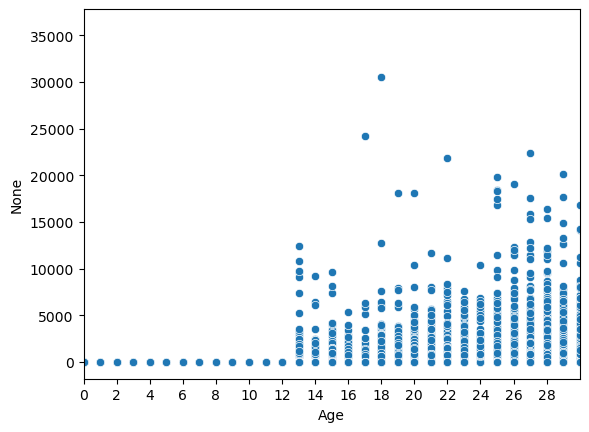

In [62]:
#First let's try to explore correlations between age and spendings

spendings = cleanData['RoomService'] + cleanData['FoodCourt'] + cleanData['ShoppingMall'] + cleanData['Spa'] + cleanData['VRDeck']

sns.scatterplot(x = cleanData['Age'],y= spendings)
plt.xlim((0, 30))
plt.xticks(np.arange(0, 30, 2))

plt.show()

#Clearly, people under the age of 13 (12 and under) have NO spendings (kind of expected something like that)

In [63]:
#This is the only interesting pattern seen, which we will take into account 

print(len(cleanData[(cleanData['Age'] > 12) & (spendings == 0) & (cleanData['CryoSleep'] == False)]))
print(len(cleanData[(cleanData['Age'] < 13) & (spendings == 0) & (cleanData['CryoSleep'] == False)]))

#It is very likely that if spendings = 0, and cryosleep = False, then the age of person is < 13

94
369


In [64]:
#Let's try to find such cases

cleanData[((spendings == 0) & (cleanData['CryoSleep'] == False) & (cleanData['Age'].isna() == True))]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,Cabin P1,Cabin P2,Cabin P3
652,0684_01,Mars,False,F/145/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Sug Conie,True,0684,3,F,145,P
1915,2055_01,Earth,False,G/330/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Belly Woodwinez,False,2055,6,G,330,P
2151,2306_02,Europa,False,C/82/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Gomeron Colensid,True,2306,6,C,82,P
5167,5517_01,Mars,False,E/357/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Totax Brazo,False,5517,1,E,357,S
5620,5977_03,Europa,False,B/230/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Alhaula Inesely,True,5977,4,B,230,S
6775,7156_02,Mars,False,E/475/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Repart Ramad,True,7156,4,E,475,S
7419,7936_02,Earth,False,G/1284/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Carley Morelly,False,7936,3,G,1284,P


In [65]:
#Okay lets get to filling i guess
#(cant use randomFill since we dont want to fill with the whole Age but just with a subset and idk how to make it work too lazy welp)

indices = cleanData[((spendings == 0) & (cleanData['CryoSleep'] == False) & (cleanData['Age'].isna() == True))].index

randomVals = np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], size = len(cleanData[((spendings == 0) & (cleanData['CryoSleep'] == False) & (cleanData['Age'].isna() == True))]), replace = True)

cleanData.loc[indices, 'Age'] = randomVals

print(cleanData['Age'].isna().sum(), "is the number of NaN Age values")

172 is the number of NaN Age values


In [66]:
#Before we fill up rest of Age with 'fake' data, let's do the converse of above, and make total spending of everyone below 13 = 0

print(cleanData.loc[:, 'RoomService':'VRDeck'].isna().sum(), " is the number of NaN values in the spending columns")

cleanData.loc[cleanData['Age'] < 13, 'RoomService':'VRDeck'] = 0

print("\n", cleanData.loc[:, 'RoomService':'VRDeck'].isna().sum(), " is the number of NaN values in the spending columns")

RoomService     111
FoodCourt       110
ShoppingMall    104
Spa             113
VRDeck          119
dtype: int64  is the number of NaN values in the spending columns

 RoomService     105
FoodCourt       104
ShoppingMall     96
Spa             110
VRDeck          103
dtype: int64  is the number of NaN values in the spending columns


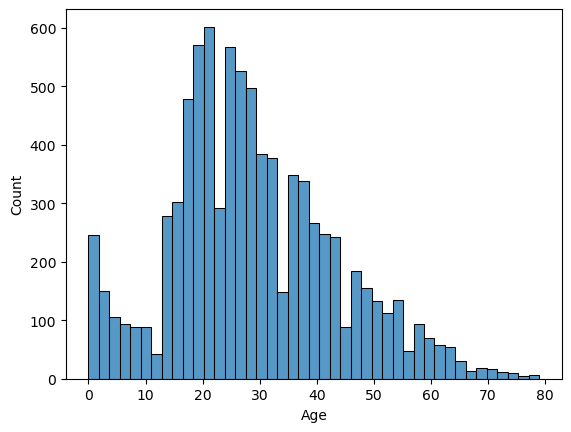

In [67]:
#Let's see complete distribution of ages

sns.histplot(cleanData['Age'])

plt.show()
#Clearly quite uneven, any mode/median wouldnt work well

In [68]:
#Age is unlikely to have any correlations with group/homeplanet or anything like that (can tell just by observing the data)

#Let's just use randomFill to randomly fill it based on everyone's age 
# (it'll automatically fill weighted by the distribution since we are picking randomly from the distribution itself)

cleanData['Age'] = randomFill(cleanData['Age'])

print(cleanData['Age'].isna().sum(), "is the number of NaN Age values")

0 is the number of NaN Age values


In [69]:
#Now let us do the same with all the spending columns that we have left, since we don't have any more ways to logic out to fill these values
#We will once again apply same randomFill function that will fill all the remaining columns based on whatever the distribution is for maximum accuracy

print(cleanData.loc[:, 'RoomService':'VRDeck'].isna().sum(), " is the number of NaN values in the spending columns")

cleanData['RoomService'] = randomFill(cleanData['RoomService'])
cleanData['FoodCourt'] = randomFill(cleanData['FoodCourt'])
cleanData['ShoppingMall'] = randomFill(cleanData['ShoppingMall'])
cleanData['Spa'] = randomFill(cleanData['Spa'])
cleanData['VRDeck'] = randomFill(cleanData['VRDeck'])

print("\n", cleanData.loc[:, 'RoomService':'VRDeck'].isna().sum(), " is the number of NaN values in the spending columns")

#AND WE ARE DONE CONGRATS

RoomService     105
FoodCourt       104
ShoppingMall     96
Spa             110
VRDeck          103
dtype: int64  is the number of NaN values in the spending columns

 RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64  is the number of NaN values in the spending columns


Okay so here, first we realised that people under the age of 13 have no spendings (thanks scatterplot)

We used this information to:
- NaN age values with 0 spendings very likely to be <13, so randomly filled with an age <13
- Age values < 13 will have all spendings = 0, so used that to fix some spendings NaN values too

Then we filled the rest of the truly unsolvable NaN points of age and spendings by using our OP randomFill function that would fill them automatically weighted by the distribution to maintain the overall distribution of the data.


### Final Cleaning Steps

In [70]:
#Let's go thru our final cleaned set, remove unnecessary columns, add important columns, reorder columns, etc

cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  GroupId       8693 non-null   object 
 15  GroupSize     8693 non-null   int64  
 16  Cabin P1      8693 non-null   object 
 17  Cabin P2      8693 non-null   Int64  
 18  Cabin P3      8693 non-null 

In [71]:
#Name has existed for far too long (completely useless data (IMO))
#I think we should also drop Cabin, since Cabin is just redundant as all information is present in Cabin P1, P2 and P3

cleanData.drop(columns = ['Name', 'Cabin'] , inplace = True)
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  GroupId       8693 non-null   object 
 13  GroupSize     8693 non-null   int64  
 14  Cabin P1      8693 non-null   object 
 15  Cabin P2      8693 non-null   Int64  
 16  Cabin P3      8693 non-null   object 
dtypes: Int64(1), bool(3), float64(6), int64(1), object(6)
memory usage: 984

In [72]:
#Add a total spendings column

cleanData['TotalSpendings'] = cleanData['RoomService'] + cleanData['FoodCourt'] + cleanData['ShoppingMall'] + cleanData['Spa'] + cleanData['VRDeck']

cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8693 non-null   object 
 2   CryoSleep       8693 non-null   bool   
 3   Destination     8693 non-null   object 
 4   Age             8693 non-null   float64
 5   VIP             8693 non-null   bool   
 6   RoomService     8693 non-null   float64
 7   FoodCourt       8693 non-null   float64
 8   ShoppingMall    8693 non-null   float64
 9   Spa             8693 non-null   float64
 10  VRDeck          8693 non-null   float64
 11  Transported     8693 non-null   bool   
 12  GroupId         8693 non-null   object 
 13  GroupSize       8693 non-null   int64  
 14  Cabin P1        8693 non-null   object 
 15  Cabin P2        8693 non-null   Int64  
 16  Cabin P3        8693 non-null   object 
 17  TotalSpendings  8693 non-null   f

In [73]:
#Make sure we dealt with all NaN values (obviously we did because of the non null count but still for self satisfaction)

cleanData.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
GroupId           0
GroupSize         0
Cabin P1          0
Cabin P2          0
Cabin P3          0
TotalSpendings    0
dtype: int64

In [74]:
#Let's reorder the columns for better readibility as our final step of data cleaning

cleanData = cleanData[['PassengerId', 'GroupId', 'GroupSize', 'Transported', 'HomePlanet', 'Destination', 'CryoSleep', 'Cabin P1', 'Cabin P2', 'Cabin P3', 'Age', 'VIP', 'TotalSpendings', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

cleanData.to_csv('cleaned_dataset.csv', index = False)

cleanData

,PassengerId,GroupId,GroupSize,Transported,HomePlanet,Destination,CryoSleep,Cabin P1,Cabin P2,Cabin P3,Age,VIP,TotalSpendings,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,0001,1,False,Europa,TRAPPIST-1e,False,B,0,P,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,0002,1,True,Earth,TRAPPIST-1e,False,F,0,S,24.0,False,736.0,109.0,9.0,25.0,549.0,44.0
2,0003_01,0003,2,False,Europa,TRAPPIST-1e,False,A,0,S,58.0,True,10383.0,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,0003,2,False,Europa,TRAPPIST-1e,False,A,0,S,33.0,False,5176.0,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,0004,1,True,Earth,TRAPPIST-1e,False,F,1,S,16.0,False,1091.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,9276,1,False,Europa,55 Cancri e,False,A,98,P,41.0,True,8536.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278_01,9278,1,False,Earth,PSO J318.5-22,True,G,1499,S,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0
8690,9279_01,9279,1,True,Earth,TRAPPIST-1e,False,G,1500,S,26.0,False,1873.0,0.0,0.0,1872.0,1.0,0.0
8691,9280_01,9280,2,False,Europa,55 Cancri e,False,E,608,S,32.0,False,4637.0,0.0,1049.0,0.0,353.0,3235.0


And with that, we are done with Data Cleaning part of task 2.

Next, we will perform exploratory data analysis and try to visualize our cleaned/preprocessed data and try to unravel the truth behind what happened in the anomaly.    

## Step 2: Data Exploration

In [75]:
#First let's see how many people transported in the first place

cleanData['Transported'].value_counts(normalize = True)

#Ooo about 50-50

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

In [76]:
#See correlations in data

cleanData.corr(numeric_only = True)

#Interesting that people with cryosleep have 45% correlation with getting transported.

,GroupSize,Transported,CryoSleep,Cabin P2,Age,VIP,TotalSpendings,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
GroupSize,1.000000,0.082644,0.082696,-0.047010,-0.173968,-0.001815,0.011188,-0.040414,0.031250,-0.037262,0.018659,0.008357
Transported,0.082644,1.000000,0.451744,-0.043415,-0.071371,-0.024602,-0.197201,-0.239582,0.043384,0.010171,-0.215669,-0.202536
CryoSleep,0.082696,0.451744,1.000000,-0.032424,-0.070774,-0.050342,-0.393117,-0.256266,-0.215547,-0.217041,-0.208034,-0.201691
Cabin P2,-0.047010,-0.043415,-0.032424,1.000000,-0.121860,-0.056465,-0.200761,-0.005813,-0.172133,0.000506,-0.120590,-0.132828
Age,-0.173968,-0.071371,-0.070774,-0.121860,1.000000,0.057514,0.183244,0.066739,0.130525,0.031407,0.117648,0.098622
VIP,-0.001815,-0.024602,-0.050342,-0.056465,0.057514,1.000000,0.107169,0.044631,0.087187,0.001196,0.035913,0.080995
TotalSpendings,0.011188,-0.197201,-0.393117,-0.200761,0.183244,0.107169,1.000000,0.236260,0.743164,0.225798,0.594336,0.587641
RoomService,-0.040414,-0.239582,-0.256266,-0.005813,0.066739,0.044631,0.236260,1.000000,-0.010963,0.056803,0.009524,-0.017720
FoodCourt,0.031250,0.043384,-0.215547,-0.172133,0.130525,0.087187,0.743164,-0.010963,1.000000,-0.010788,0.222016,0.227273
ShoppingMall,-0.037262,0.010171,-0.217041,0.000506,0.031407,0.001196,0.225798,0.056803,-0.010788,1.000000,0.017544,-0.004258


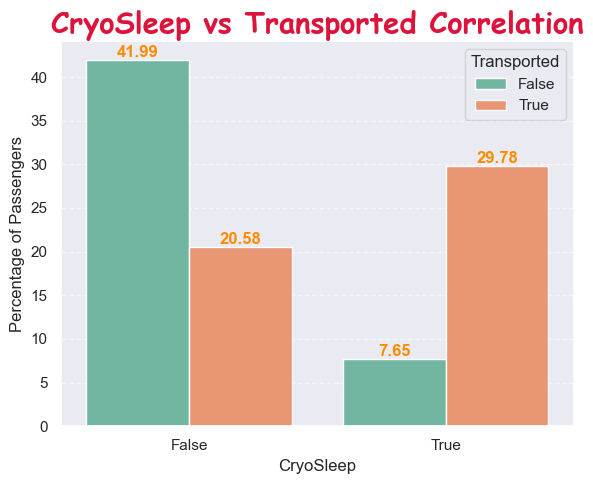

In [77]:
#%Plot for people transported in correlation to cryosleep status
saveDir = './InterestingPlots/'

plt.figure(figsize = (6, 5), dpi = 100)

sns.set_theme()
ax = sns.countplot(data = cleanData, x = 'CryoSleep', hue = 'Transported', stat = 'percent', palette = 'Set2')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f', weight = 'bold', color = 'darkorange')

titleFont = {'weight': 'bold', 'name': 'Comic Sans MS', 'color': 'crimson'}

plt.title('CryoSleep vs Transported Correlation', fontdict = titleFont, size = 21)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.ylabel('Percentage of Passengers', size = 12)

plt.tight_layout()
plt.savefig(saveDir + 'CryoSleep.jpeg', dpi = 300)
plt.show()

In [78]:
#% of Cryosleep = True users that have been transported

cleanData[cleanData['CryoSleep'] == True]['Transported'].value_counts(normalize = True)

#Almost 80%!!!

Transported
True     0.795636
False    0.204364
Name: proportion, dtype: float64

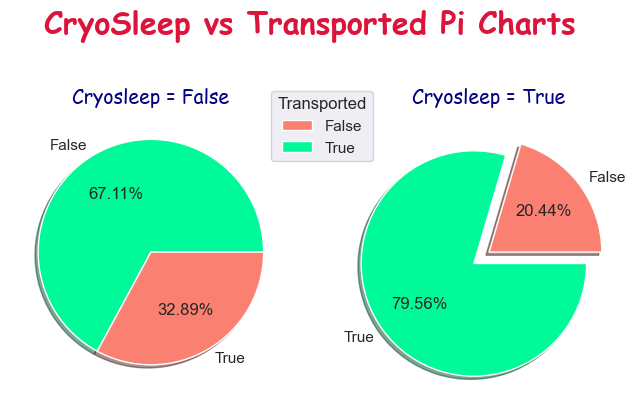

In [79]:
#Pie charts of passengers transported based on cryosleep status

plt.figure(figsize = (8, 5), dpi = 100)
plt.suptitle('CryoSleep vs Transported Pi Charts', weight = 'bold', color = 'crimson', fontname = 'Comic Sans MS', size = 22)

subHeadFont = {'color': 'navy', 'name':'Comic Sans MS'}

plt.subplot(1, 2, 1)
plt.title('Cryosleep = False', fontdict = subHeadFont, size = 14)
plt.pie(cleanData[cleanData['CryoSleep'] == False]['Transported'].value_counts(), labels = {False, True}, colors = {'salmon', 'mediumspringgreen'}, shadow = True, autopct = '%.2f%%')

plt.subplot(1, 2, 2)
plt.title('Cryosleep = True', fontdict = subHeadFont, size = 14)
plt.pie(cleanData[cleanData['CryoSleep'] == True]['Transported'].value_counts(ascending = True), labels = {True, False}, colors = {'mediumspringgreen', 'salmon'}, explode = {0, 0.169}, shadow = True, autopct = '%.2f%%')

plt.legend(title = 'Transported', loc = 'upper left', bbox_to_anchor = (-0.3, 1.1))

plt.savefig(saveDir + 'CryoSleep2.jpeg', dpi = 150)
plt.show()

Since ~50% of people have been transported and ~50% have not, we would expect ~50% of people in cryosleep = False and cryosleep = True to be transported and 50% not.

It is clear from our beautifully visualized data that:
- CryoSleep = False decreases chances of transportation
- CryoSleep = True increases chances of transportation significantly

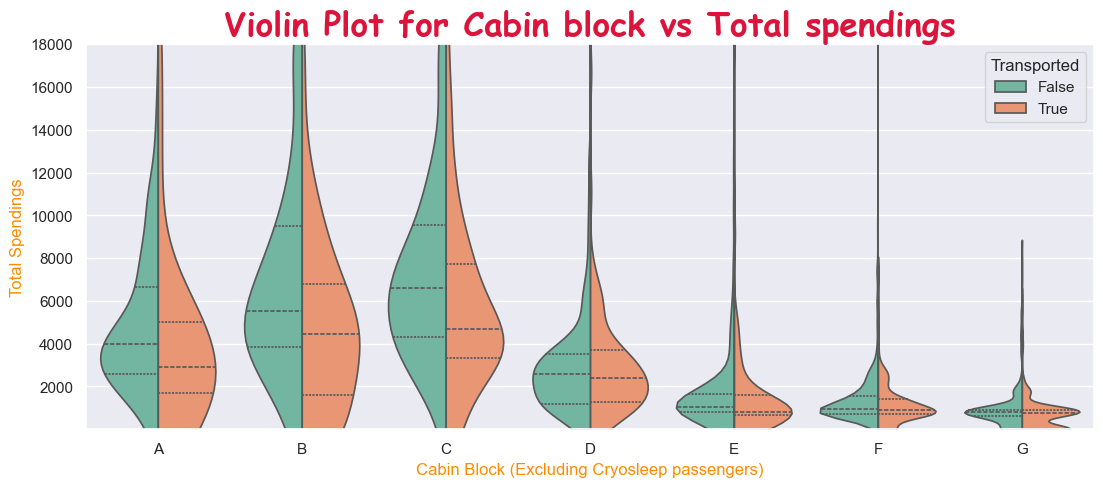

In [111]:
#Think its fair to assume that different cabins blocks may have differently priced rooms
#This would imply that the richer families in different blocks?
#Maybe this would mean that different cabin blocks have different spendings, let's test this together with spendings vs transported

#Let's also consider non-cryosleep people, since they will skew the results towards 0
plt.figure(figsize = (13, 5), dpi = 100)

#We are adding density_norm = 'width', since 1) Plot looks much better
# 2) We are actually interested in relative spending between transported = True and False + Spendings vs Cabin
# What we are not interested in, is the actual number density of people in each cabin since we already know that each cabin has more people
sns.violinplot(data = cleanData[cleanData['CryoSleep'] == False], x = 'Cabin P1', density_norm = 'width', order = sorted(cleanData['Cabin P1'].unique()), y = 'TotalSpendings', hue = 'Transported', split = True, palette = 'Set2', inner="quart")

#Plot looks really squished and ruined because of rich mfs that spent insane amounts of money skewing the data
#We don't care about the outliers anyways ig, let's just look at the important data, but there are extreme outliers in every cabin
plt.ylim(1, 18000)

plt.title("Violin Plot for Cabin block vs Total spendings", fontdict = titleFont, size = 24)
plt.ylabel('Total Spendings', color = 'darkorange' )
plt.xlabel('Cabin Block (Excluding Cryosleep passengers)', color = 'darkorange')

plt.show()

In [ ]:
#This tells us that 